In [42]:
#Projet Meteo 
#Bac à sable Samuel

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn.decomposition import PCA
warnings.filterwarnings("ignore")
sns.set_theme()
from sklearn.preprocessing import StandardScaler

In [43]:
df = pd.read_csv('../data/weatherAUS.csv')

In [44]:
df.shape

(145460, 23)

In [45]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

# df1 : On supprime toutes les lignes avec au moins une colonne manquante

In [47]:
#On supprime toutes les lignes avec au moins une colonne manquante 

df1=df.dropna(axis = 0, how = 'any') 
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cl

In [48]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

# df2 On supprime les colonnes qui comprennent 40%+ de nan

In [49]:
#On supprime Evaporation, Sunshine, Cloud9am, Cloud 3PM puis toutes les lignes restantes avec au moins une colonne manquante 
df2 = df.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'],1) 
df2=df2.dropna(axis = 0, how = 'any') 
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112925 entries, 0 to 145458
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           112925 non-null  object 
 1   Location       112925 non-null  object 
 2   MinTemp        112925 non-null  float64
 3   MaxTemp        112925 non-null  float64
 4   Rainfall       112925 non-null  float64
 5   WindGustDir    112925 non-null  object 
 6   WindGustSpeed  112925 non-null  float64
 7   WindDir9am     112925 non-null  object 
 8   WindDir3pm     112925 non-null  object 
 9   WindSpeed9am   112925 non-null  float64
 10  WindSpeed3pm   112925 non-null  float64
 11  Humidity9am    112925 non-null  float64
 12  Humidity3pm    112925 non-null  float64
 13  Pressure9am    112925 non-null  float64
 14  Pressure3pm    112925 non-null  float64
 15  Temp9am        112925 non-null  float64
 16  Temp3pm        112925 non-null  float64
 17  RainToday      112925 non-nul

# df3 On remplace les Nan par la médiane et le mode 

In [50]:
#On remplace les valeurs manquantes par la médiane ou le mode le plus fréquent de l'ensemble du dataframe

# Extraction des variables catégorielles
cat_var_names = df.columns[df.dtypes=='object']
cat_vars = df[cat_var_names]

# Extraction des variables quantitatives
num_var_names = df.columns[df.dtypes=='float64']
num_vars = df[num_var_names]

num_vars=num_vars.fillna(df.median())

fill_mode = lambda col: col.fillna(col.mode()[0])
cat_vars=cat_vars.apply(fill_mode, axis=0)

df3=pd.concat([num_vars,cat_vars],axis=1)
df3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        145460 non-null  float64
 1   MaxTemp        145460 non-null  float64
 2   Rainfall       145460 non-null  float64
 3   Evaporation    145460 non-null  float64
 4   Sunshine       145460 non-null  float64
 5   WindGustSpeed  145460 non-null  float64
 6   WindSpeed9am   145460 non-null  float64
 7   WindSpeed3pm   145460 non-null  float64
 8   Humidity9am    145460 non-null  float64
 9   Humidity3pm    145460 non-null  float64
 10  Pressure9am    145460 non-null  float64
 11  Pressure3pm    145460 non-null  float64
 12  Cloud9am       145460 non-null  float64
 13  Cloud3pm       145460 non-null  float64
 14  Temp9am        145460 non-null  float64
 15  Temp3pm        145460 non-null  float64
 16  Date           145460 non-null  object 
 17  Location       145460 non-nul

# df4 On essaye de nettoyer le dataset en exploitant les corrélations et la physique

<AxesSubplot:>

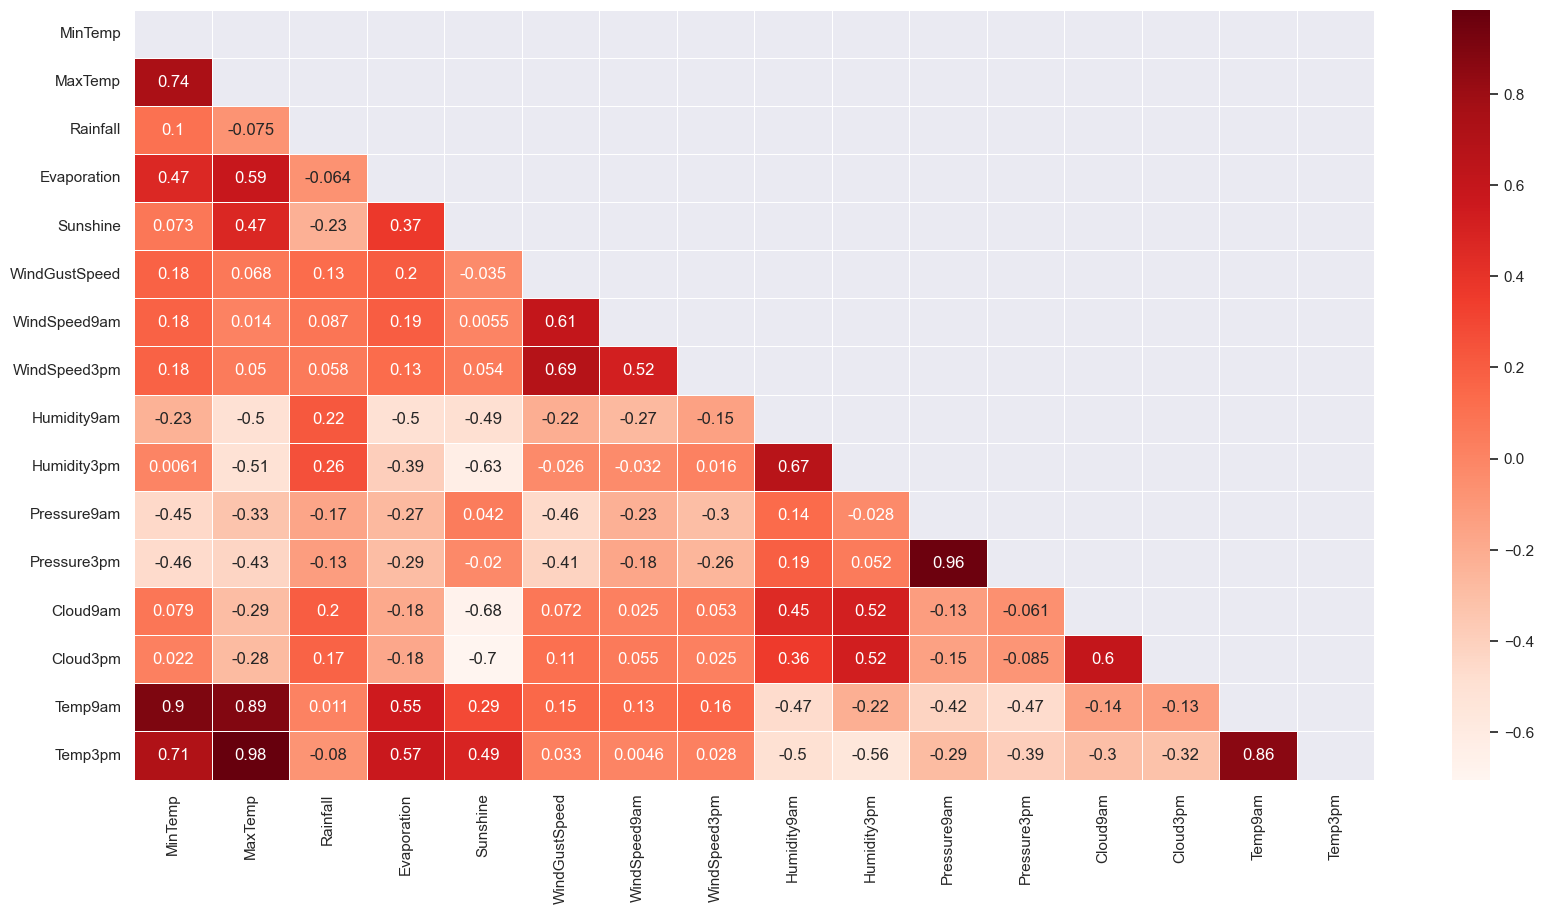

In [51]:
# lets see the correlation between eachother by using heatmap
fig, ax = plt.subplots(figsize=(20,10))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
sns.heatmap(df.corr(), annot=True, cmap="Reds", mask=mask, linewidth=0.5)

In [57]:
#Cellule très lourde, resultat sauvegardé en CSV, voir cellule suivante
#On supprimes les lignes pour lesquelles la variable cible est nulle 

df4=df.dropna(subset='RainTomorrow',axis = 0, how = 'any')

# Au vu des corrélations, on observe une corr > 0.9 pour (Temp9am et MinTemp), (Temp3PM et MaxTemp), (Pressure3PM et Pressure9AM)
# Dans ces couples, on supprime les colonnes avec le plus de valeurs nulles 

df4=df4.drop(columns=['Temp9am','Temp3pm','Pressure9am'],axis=1)

dftest=df4[df4.RainToday.isnull()]

df4["month"] = pd.to_datetime(df4["Date"]).dt.month
df4["year"] = pd.to_datetime(df4["Date"]).dt.year

# column for 'season' with values 'Winter', 'Spring', 'Summer', or 'Autumn' based on the month 
df4['season'] = df4['month'].apply(lambda x: 'summer' if x in [12, 1, 2] else 'autumn' if x in [3, 4, 5] else 'winter' if x in [6, 7, 8] else 'spring')


# Certaines villes non aucune valeur d'evaporation, sunshine, cloud sur l'ensemble du dataset
Median = df4[['Location','Evaporation','Sunshine','Cloud9am','Cloud3pm']].groupby(['Location']).median(numeric_only=True)
Median.head(60)

# Classement des villes en fonction de leur region
regions = { 'Albury': 'Victoria',
             'Adelaide': 'South_Australia',
             'Albany': 'Western_Australia',
             'AliceSprings': 'Northern_Territory_South',
             'BadgerysCreek': 'New_South_Wales',
             'Ballarat': 'Victoria',
             'Bendigo': 'Victoria',
             'Brisbane': 'Queensland_South',
             'Cairns': 'Queensland_North',
             'Canberra': 'New_South_Wales',
             'Cobar': 'New_South_Wales',
             'CoffsHarbour': 'New_South_Wales',
             'Dartmoor': 'Western_Australia',
             'Darwin': 'Northern_Territory_North',
             'GoldCoast': 'Queensland_South',
             'Hobart': 'Tasmania',
             'Katherine': 'Northern_Territory_North',
             'Launceston': 'Tasmania',
             'Melbourne': 'Victoria',
             'MelbourneAirport': 'Victoria',
             'Mildura': 'Victoria',
             'Moree': 'New_South_Wales',
             'MountGambier': 'Victoria',
             'MountGinini': 'New_South_Wales',
             'Newcastle': 'New_South_Wales',
             'Nhil': 'Victoria',
             'NorahHead': 'New_South_Wales',
             'NorfolkIsland': 'New_South_Wales',
             'Nuriootpa': 'South_Australia',
             'PearceRAAF': 'Western_Australia',
             'Penrith': 'New_South_Wales',
             'Perth': 'Western_Australia',
             'PerthAirport': 'Western_Australia',
             'Portland': 'Victoria',
             'Richmond': 'Victoria',
             'Sale': 'Victoria',
             'SalmonGums': 'Western_Australia',
             'Sydney': 'New_South_Wales',
             'SydneyAirport': 'New_South_Wales',
             'Townsville': 'Queensland_North',
             'Tuggeranong': 'New_South_Wales',
             'Uluru': 'Northern_Territory_South',
             'WaggaWagga': 'New_South_Wales',
             'Walpole': 'Western_Australia',
             'Watsonia': 'Victoria',
             'Williamtown': 'New_South_Wales',
             'Witchcliffe': 'Western_Australia',
             'Wollongong': 'New_South_Wales',
             'Woomera': 'South_Australia'}


df4['regions'] = df4['Location'].map(regions)


#On pourrait utiliser des valeurs médiane par région : région vaste et on reste avec des valeurs mediane sur tous le dataset pour certaines villes
Median2 = df4[['Location','regions','Evaporation','Sunshine','Cloud9am','Cloud3pm']].groupby(['regions']).median(numeric_only=True)
#Median2.head(60)

#Ou utiliser une ville proche comme référente pour les villes où les données manquent

referent = { 'Albury': 'WaggaWagga',
             'Adelaide': 'Nuriootpa',
             'Albany': 'Walpole',
             'AliceSprings': 'Uluru',
             'BadgerysCreek': 'Sydney',
             'Ballarat': 'MelbourneAirport',
             'Bendigo': 'MelbourneAirport',
             'Brisbane': 'GoldCoast',
             'Cairns': 'Townsville',
             'Canberra': 'Tuggeranong',
             'Cobar': 'Moree',
             'CoffsHarbour': 'GoldCoast',
             'Dartmoor': 'Perth',
             'Darwin': 'Katherine',
             'GoldCoast': 'Brisbane',
             'Hobart': 'Launceston',
             'Katherine': 'Darwin',
             'Launceston': 'Hobart',
             'Melbourne': 'MelbourneAirport',
             'MelbourneAirport': 'Melbourne',
             'Mildura': 'Nhil',
             'Moree': 'Cobar',
             'MountGambier': 'Portland',
             'MountGinini': 'Tuggeranong',
             'Newcastle': 'Williamtown',
             'Nhil': 'Mildura',
             'NorahHead': 'Newcastle',
             'NorfolkIsland': 'GoldCoast',
             'Nuriootpa': 'Adelaide',
             'PearceRAAF': 'Perth',
             'Penrith': 'Sydney',
             'Perth': 'PerthAirport',
             'PerthAirport': 'Perth',
             'Portland': 'MountGambier',
             'Richmond': 'Melbourne',
             'Sale': 'Melbourne',
             'SalmonGums': 'Albany',
             'Sydney': 'SydneyAirport',
             'SydneyAirport': 'Sydney',
             'Townsville': 'Cairns',
             'Tuggeranong': 'Canberra',
             'Uluru': 'AliceSprings',
             'WaggaWagga': 'Albury',
             'Walpole': 'Albany',
             'Watsonia': 'Melbourne',
             'Williamtown': 'Newcastle',
             'Witchcliffe': 'Perth',
             'Wollongong': 'Sydney',
             'Woomera': 'Nuriootpa'}

df4['referent'] = df4['Location'].map(referent)

#x_ref=np.where((df4['Location']=='Albany') & (df4['Date']=="2008-12-01"))
#df4.iloc[x_ref[0],5]

xnull,ynull=np.where(df4.isnull())
i=0;

#Bonne grosse boucle bien grasse sur l'ensemble des valeurs nulles et on les remplace une à une 
for x,y in zip(xnull,ynull):
    referent=df4.iloc[x,24]    #On identifie la ville référente de la ligne où la valeur est manquante
    date=df4.iloc[x,0]  #On identifie la date de la ligne où la valeur est manquante
    x_ref=np.where((df4['Location']==referent) & (df4['Date']==date)) #On identifie la ligne pour cette date et cette ville référente
    
    if len(x_ref[0])!=0:
        df4.iloc[x,y]=df4.iloc[x_ref[0][0],y]  #On remplace la valeur nulle par la valeur de la ville référente
        
    # Equivalent à (i % 2**10) = (i % 1024)
    if not (i % 25000):
        print(i)
    
    i+=1
        
df4.info()

0
25000
50000
75000
100000
125000
150000
175000
200000
225000
250000
275000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        142142 non-null  float64
 3   MaxTemp        142171 non-null  float64
 4   Rainfall       142132 non-null  float64
 5   Evaporation    127931 non-null  float64
 6   Sunshine       121291 non-null  float64
 7   WindGustDir    140519 non-null  object 
 8   WindGustSpeed  140582 non-null  float64
 9   WindDir9am     140312 non-null  object 
 10  WindDir3pm     141816 non-null  object 
 11  WindSpeed9am   142096 non-null  float64
 12  WindSpeed3pm   142021 non-null  float64
 13  Humidity9am    142116 non-null  float64
 14  Humidity3pm    142026 non-null  float64
 15  Pressure3pm    141577 non-null  float64
 16

In [61]:
#df4.to_csv('./df5.csv') 


In [99]:
df4=pd.read_csv('./df5.csv',index_col='Id')

In [100]:
df4=df4.dropna(axis = 0, how = 'any') 
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114474 entries, 31 to 145034
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           114474 non-null  object 
 1   Location       114474 non-null  object 
 2   MinTemp        114474 non-null  float64
 3   MaxTemp        114474 non-null  float64
 4   Rainfall       114474 non-null  float64
 5   Evaporation    114474 non-null  float64
 6   Sunshine       114474 non-null  float64
 7   WindGustDir    114474 non-null  object 
 8   WindGustSpeed  114474 non-null  float64
 9   WindDir9am     114474 non-null  object 
 10  WindDir3pm     114474 non-null  object 
 11  WindSpeed9am   114474 non-null  float64
 12  WindSpeed3pm   114474 non-null  float64
 13  Humidity9am    114474 non-null  float64
 14  Humidity3pm    114474 non-null  float64
 15  Pressure3pm    114474 non-null  float64
 16  Cloud9am       114474 non-null  float64
 17  Cloud3pm       114474 non-nu

# PCA sur df1 (Drop lines of nan any values)

In [185]:
# J'encode (brutalement) les variables qualitatives 
# A ne pas exécuter si on veut garder les chaines de caractères

df1["Date"] = pd.to_datetime(df["Date"]).dt.month

la = LabelEncoder()
l = []
for i in df1.columns:
    if df1.dtypes[i]=='O':
        l.append(i)

for i in l:
    print(i)
    df1[i] = la.fit_transform(df1[i])

df1["Date"] = pd.to_datetime(df["Date"]).dt.month

df1.describe()


Location
WindGustDir
WindDir9am
WindDir3pm
RainToday
RainTomorrow


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,...,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,6.425009,12.628837,13.464770,24.219206,2.130397,5.503135,7.735626,7.485537,40.877366,7.122935,...,65.874123,49.601985,1017.239505,1014.795580,4.241705,4.326515,18.204961,22.710333,0.220879,0.220259
std,3.451383,7.301231,6.416689,6.970676,7.014822,3.696282,3.758153,4.792305,13.335232,4.660823,...,18.513289,20.197040,6.909357,6.870892,2.797162,2.647251,6.567991,6.836543,0.414843,0.414425
min,1.000000,0.000000,-6.700000,4.100000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,...,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-0.700000,3.700000,0.000000,0.000000
25%,3.000000,7.000000,8.600000,18.700000,0.000000,2.800000,5.000000,3.000000,31.000000,3.000000,...,55.000000,35.000000,1012.700000,1010.100000,1.000000,2.000000,13.100000,17.400000,0.000000,0.000000
50%,6.000000,13.000000,13.200000,23.900000,0.000000,5.000000,8.600000,8.000000,39.000000,7.000000,...,67.000000,50.000000,1017.200000,1014.700000,5.000000,5.000000,17.800000,22.400000,0.000000,0.000000
75%,9.000000,19.000000,18.400000,29.700000,0.600000,7.400000,10.700000,12.000000,48.000000,11.000000,...,79.000000,63.000000,1021.800000,1019.400000,7.000000,7.000000,23.300000,27.900000,0.000000,0.000000
max,12.000000,25.000000,31.400000,48.100000,206.200000,81.200000,14.500000,15.000000,124.000000,15.000000,...,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000,1.000000,1.000000


In [204]:

data = df1.drop('RainTomorrow',1)

X_st =  StandardScaler().fit_transform(data)
data = pd.DataFrame(X_st)

pca = PCA(n_components = 0.9)
pca.fit(data)
print("Nombre de composantes retenues :", pca.n_components_)

df1.columns

Nombre de composantes retenues : 12


Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

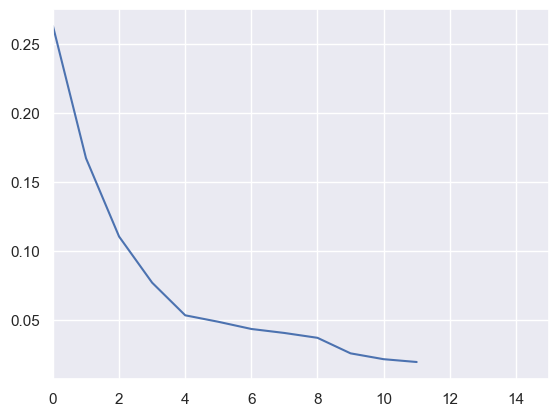

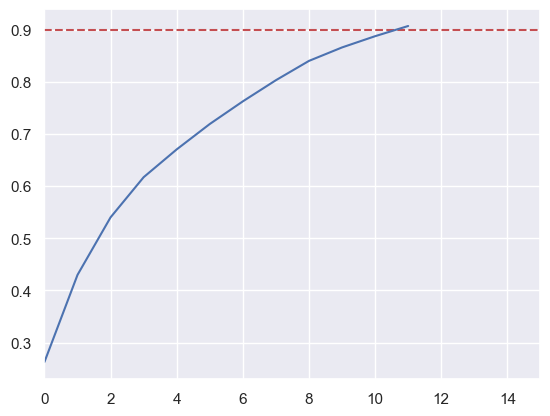

In [205]:
plt.figure()
plt.xlim(0,15)
plt.plot(pca.explained_variance_ratio_);

plt.figure()
plt.xlim(0,15)
plt.axhline(y = 0.9, color ='r', linestyle = '--')
plt.plot(pca.explained_variance_ratio_.cumsum());


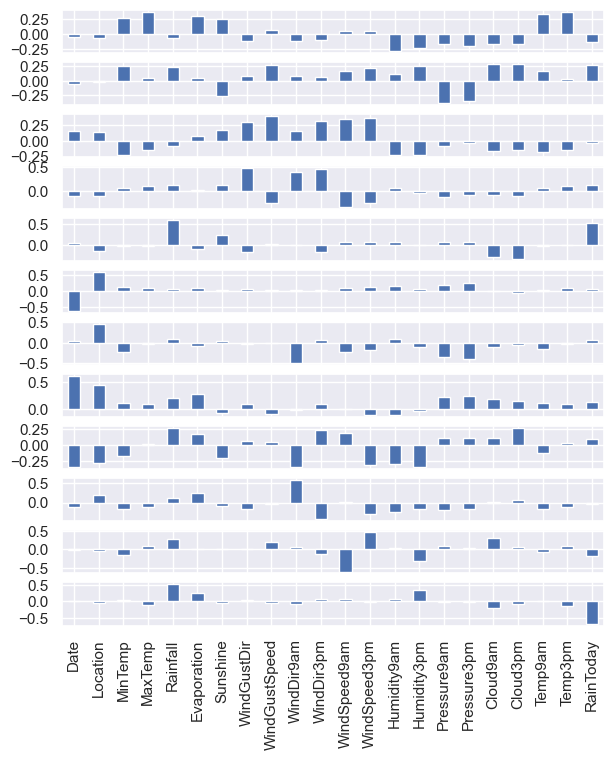

In [206]:
fig, ax = plt.subplots(pca.n_components_,1, sharex=True, figsize=(7,8))

for n in range(pca.n_components_):
    pd.Series(pca.components_[n], index=df1.columns[:-1]).plot.bar(ax=ax[n])


    
    

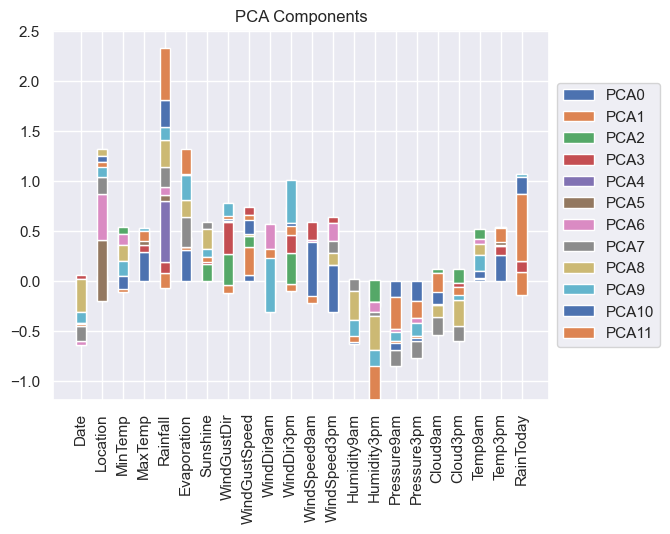

In [207]:
data = pca.components_

index = df1.columns[:-1]
bar_width = 0.5

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(index))

for row in range(len(data)):
    plt.bar(index, data[row], bar_width, bottom=y_offset,label='PCA'+str(row))
    y_offset = y_offset + data[row]
   
    
plt.xticks(rotation=90)
plt.title('PCA Components')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# PCA sur df2 (Drop sunshine, cloud, Evaporation puis lines)

In [191]:
# J'encode (brutalement) les variables qualitatives 
# A ne pas exécuter si on veut garder les chaines de caractères

df2["Date"] = pd.to_datetime(df["Date"]).dt.month

la = LabelEncoder()
l = []
for i in df2.columns:
    if df2.dtypes[i]=='O':
        l.append(i)

for i in l:
    print(i)
    df2[i] = la.fit_transform(df2[i])

df2["Date"] = pd.to_datetime(df["Date"]).dt.month

df2.describe()


Location
WindGustDir
WindDir9am
WindDir3pm
RainToday
RainTomorrow


,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000
mean,6.431499,21.316520,12.664721,23.655670,2.377892,7.720655,40.786611,7.237618,7.759478,15.179163,19.500545,67.404162,50.669055,1017.425847,1015.048962,17.462008,22.127306,0.224654,0.221554
std,3.476314,12.782637,6.254135,6.982702,8.602968,4.673142,13.321774,4.550401,4.615792,8.344304,8.580097,18.911610,20.768550,7.032654,6.957822,6.355045,6.837380,0.417356,0.415294
min,1.000000,0.000000,-8.200000,2.600000,0.000000,0.000000,7.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,-3.100000,1.700000,0.000000,0.000000
25%,3.000000,10.000000,8.100000,18.300000,0.000000,3.000000,31.000000,3.000000,4.000000,9.000000,13.000000,56.000000,36.000000,1012.800000,1010.300000,12.700000,16.900000,0.000000,0.000000
50%,6.000000,21.000000,12.400000,23.100000,0.000000,8.000000,39.000000,7.000000,8.000000,13.000000,19.000000,68.000000,51.000000,1017.400000,1015.000000,17.100000,21.600000,0.000000,0.000000
75%,9.000000,32.000000,17.200000,28.700000,0.800000,12.000000,48.000000,11.000000,12.000000,20.000000,24.000000,81.000000,65.000000,1022.100000,1019.700000,22.000000,26.900000,0.000000,0.000000
max,12.000000,43.000000,33.900000,48.100000,367.600000,15.000000,135.000000,15.000000,15.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000,1.000000,1.000000


In [192]:

data = df2.drop('RainTomorrow',1)

X_st =  StandardScaler().fit_transform(data)
data = pd.DataFrame(X_st)

pca = PCA(n_components = 0.9)
pca.fit(data)
print("Nombre de composantes retenues :", pca.n_components_)

df2.columns

Nombre de composantes retenues : 10


Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

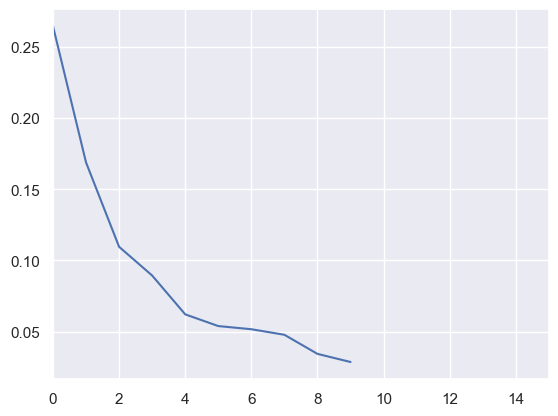

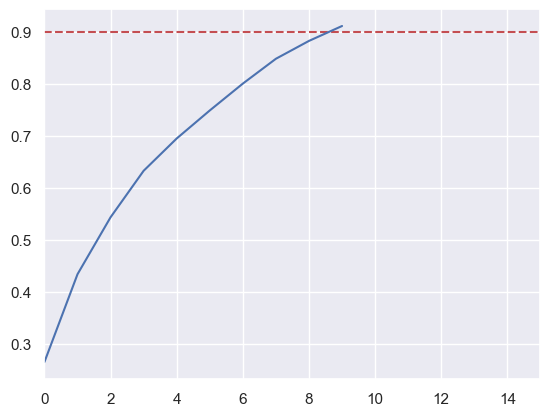

In [193]:
plt.figure()
plt.xlim(0,15)
plt.plot(pca.explained_variance_ratio_);

plt.figure()
plt.xlim(0,15)
plt.axhline(y = 0.9, color ='r', linestyle = '--')
plt.plot(pca.explained_variance_ratio_.cumsum());

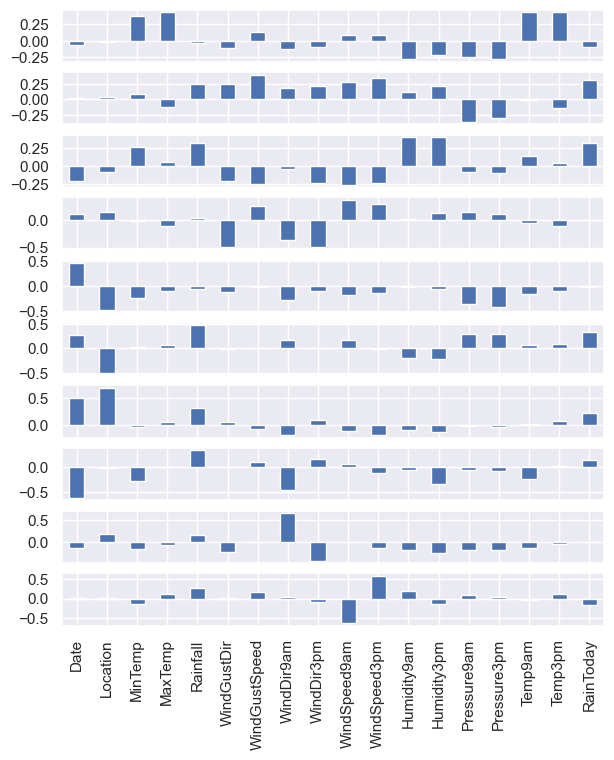

In [194]:
fig, ax = plt.subplots(pca.n_components_,1, sharex=True, figsize=(7,8))

for n in range(pca.n_components_):
    pd.Series(pca.components_[n], index=df2.columns[:-1]).plot.bar(ax=ax[n])


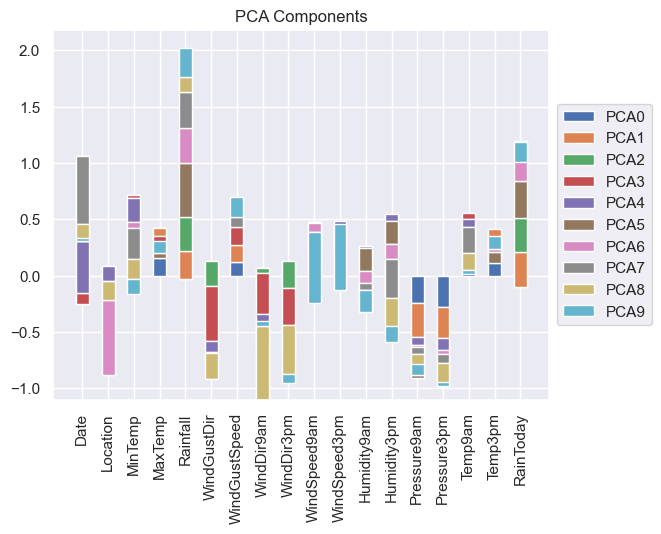

In [199]:
data = pca.components_

index = df2.columns[:-1]
bar_width = 0.5

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(index))

for row in range(len(data)):
    plt.bar(index, data[row], bar_width, bottom=y_offset,label='PCA'+str(row))
    y_offset = y_offset + data[row]
   
    
plt.xticks(rotation=90)
plt.title('PCA Components')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# PCA sur df3 (median et mode le plus fréquent)

In [31]:
# J'encode (brutalement) les variables qualitatives 
# A ne pas exécuter si on veut garder les chaines de caractères

df3["Date"] = pd.to_datetime(df["Date"]).dt.month

la = LabelEncoder()
l = []
for i in df3.columns:
    if df3.dtypes[i]=='O':
        l.append(i)

for i in l:
    print(i)
    df3[i] = la.fit_transform(df3[i])

df3["Date"] = pd.to_datetime(df["Date"]).dt.month

df3.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Cloud3pm,Temp9am,Temp3pm,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,...,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.00000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.192053,23.215962,2.307990,5.179779,7.989889,39.962189,14.030751,18.669758,68.901251,51.553396,...,4.709913,16.987101,21.668916,6.399615,23.793524,8.09360,6.999526,7.798852,0.219167,0.219146
std,6.365780,7.088358,8.389771,3.178819,2.757790,13.120931,8.861796,8.716716,18.855360,20.471345,...,2.106768,6.449299,6.850658,3.427262,14.228687,4.69411,4.515839,4.538135,0.413683,0.413669
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-7.200000,-5.400000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7.700000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,...,4.000000,12.300000,16.700000,3.000000,11.000000,4.00000,3.000000,4.000000,0.000000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,...,5.000000,16.700000,21.100000,6.000000,24.000000,9.00000,7.000000,8.000000,0.000000,0.000000
75%,16.800000,28.200000,0.600000,5.200000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,...,6.000000,21.500000,26.200000,9.000000,36.000000,13.00000,11.000000,12.000000,0.000000,0.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,...,9.000000,40.200000,46.700000,12.000000,48.000000,15.00000,15.000000,15.000000,1.000000,1.000000


In [32]:

data = df3.drop('RainTomorrow',1)

X_st =  StandardScaler().fit_transform(data)
data = pd.DataFrame(X_st)

pca = PCA(n_components = 0.9)
pca.fit(data)
print("Nombre de composantes retenues :", pca.n_components_)

df3.columns

Nombre de composantes retenues : 13


Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Date', 'Location', 'WindGustDir', 'WindDir9am',
       'WindDir3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

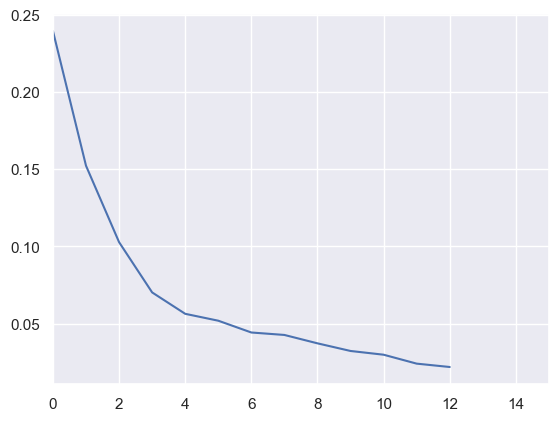

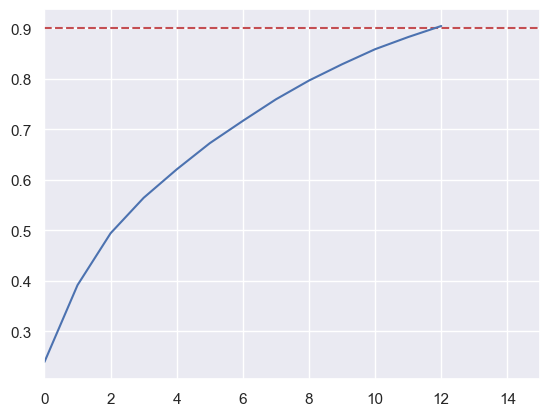

In [33]:
plt.figure()
plt.xlim(0,15)
plt.plot(pca.explained_variance_ratio_);

plt.figure()
plt.xlim(0,15)
plt.axhline(y = 0.9, color ='r', linestyle = '--')
plt.plot(pca.explained_variance_ratio_.cumsum());

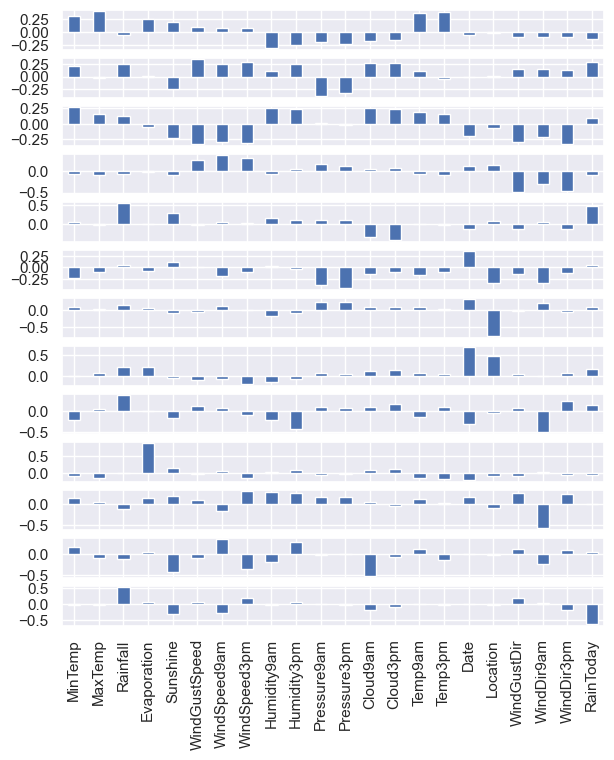

In [34]:
fig, ax = plt.subplots(pca.n_components_,1, sharex=True, figsize=(7,8))

for n in range(pca.n_components_):
    pd.Series(pca.components_[n], index=df3.columns[:-1]).plot.bar(ax=ax[n])


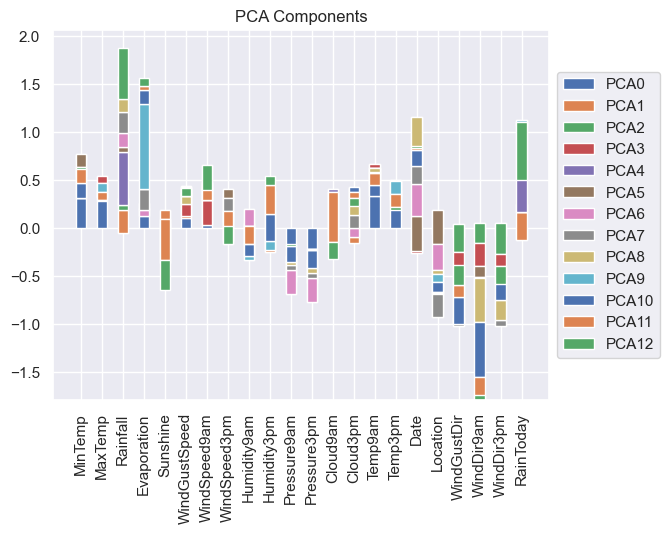

In [35]:
data = pca.components_

index = df3.columns[:-1]
bar_width = 0.5

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(index))

for row in range(len(data)):
    plt.bar(index, data[row], bar_width, bottom=y_offset,label='PCA'+str(row))
    y_offset = y_offset + data[row] 
    
plt.xticks(rotation=90)
plt.title('PCA Components')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# PCA sur df4 (Ville référente)

In [101]:
# J'encode (brutalement) les variables qualitatives 
# A ne pas exécuter si on veut garder les chaines de caractères

la = LabelEncoder()
l = []
for i in df4.columns:
    if df4.dtypes[i]=='O':
        l.append(i)

for i in l:
    print(i)
    df4[i] = la.fit_transform(df4[i])


df4=df4.drop(['Date','referent','regions','season','year'],axis=1)

df4.describe()

Date
Location
WindGustDir
WindDir9am
WindDir3pm
RainToday
RainTomorrow
season
regions
referent


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,month
count,114474.000000,114474.000000,114474.000000,114474.000000,114474.000000,114474.000000,114474.000000,114474.000000,114474.000000,114474.000000,114474.000000,114474.000000,114474.000000,114474.000000,114474.000000,114474.000000,114474.000000,114474.000000,114474.000000,114474.000000
mean,23.713743,12.595172,23.563347,2.248795,5.327452,7.584924,7.700273,40.129077,7.248877,7.695616,14.369210,18.940432,68.409639,51.381554,1015.229078,4.254381,4.311931,0.222583,0.223667,6.401567
std,14.336750,6.295756,7.002430,7.881053,3.770396,3.794183,4.655999,13.458301,4.560655,4.609883,8.800947,8.774805,18.973437,20.579454,7.002610,2.858804,2.699264,0.415983,0.416703,3.433894
min,0.000000,-8.500000,-3.100000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,977.100000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,11.000000,8.000000,18.200000,0.000000,2.600000,4.800000,3.000000,31.000000,3.000000,4.000000,7.000000,13.000000,57.000000,37.000000,1010.400000,1.000000,1.000000,0.000000,0.000000,3.000000
50%,24.000000,12.400000,23.000000,0.000000,4.600000,8.400000,8.000000,39.000000,7.000000,8.000000,13.000000,19.000000,69.000000,52.000000,1015.200000,5.000000,5.000000,0.000000,0.000000,6.000000
75%,36.000000,17.200000,28.600000,0.700000,7.200000,10.600000,12.000000,48.000000,11.000000,12.000000,20.000000,24.000000,82.000000,65.000000,1020.000000,7.000000,7.000000,0.000000,0.000000,9.000000
max,48.000000,33.900000,48.100000,371.000000,82.400000,14.500000,15.000000,135.000000,15.000000,15.000000,87.000000,83.000000,100.000000,100.000000,1039.600000,9.000000,9.000000,1.000000,1.000000,12.000000


In [106]:
data = df4.drop('RainTomorrow',1)

X_st =  StandardScaler().fit_transform(data)
data = pd.DataFrame(X_st)

pca = PCA(n_components = 0.9)
pca.fit(data)
print("Nombre de composantes retenues :", pca.n_components_)

df4=df4.drop('RainTomorrow',1)
df4.columns

Nombre de composantes retenues : 13


Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday', 'month'],
      dtype='object')

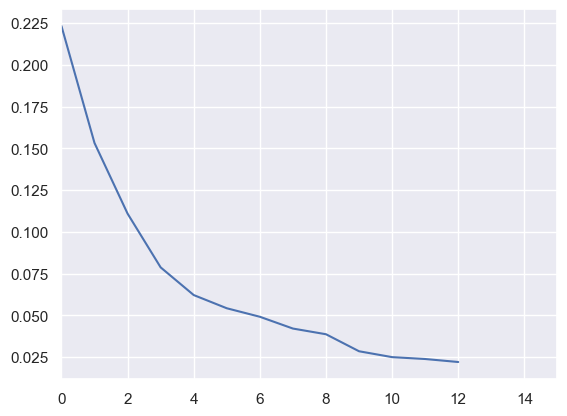

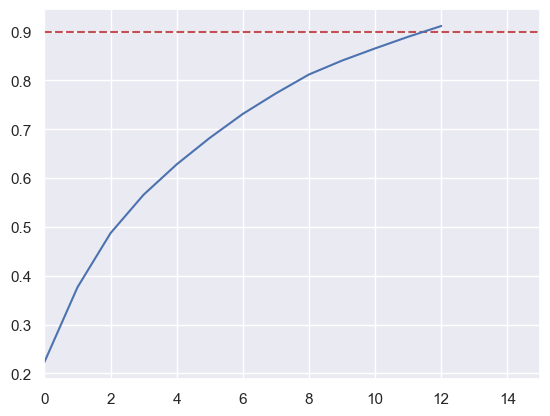

In [107]:
plt.figure()
plt.xlim(0,15)
plt.plot(pca.explained_variance_ratio_);

plt.figure()
plt.xlim(0,15)
plt.axhline(y = 0.9, color ='r', linestyle = '--')
plt.plot(pca.explained_variance_ratio_.cumsum());

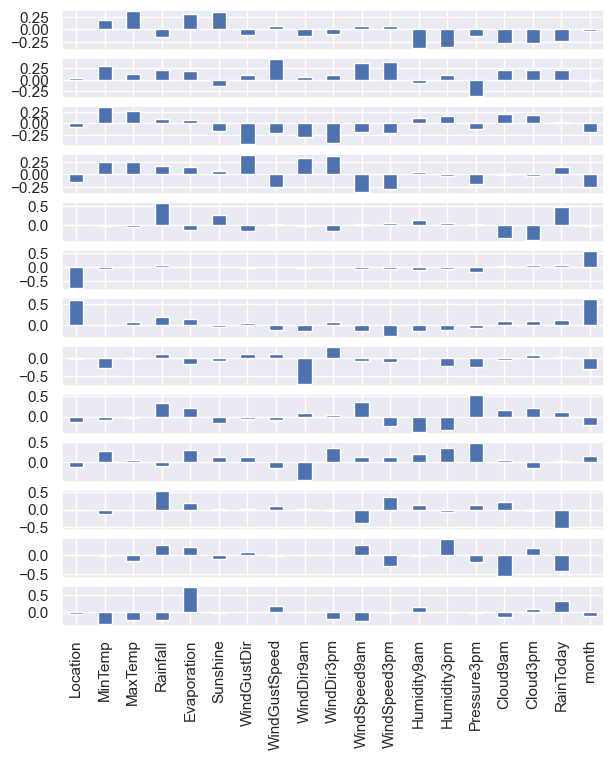

In [109]:
fig, ax = plt.subplots(pca.n_components_,1, sharex=True, figsize=(7,8))

for n in range(pca.n_components_):
    pd.Series(pca.components_[n], index=df4.columns[:]).plot.bar(ax=ax[n])

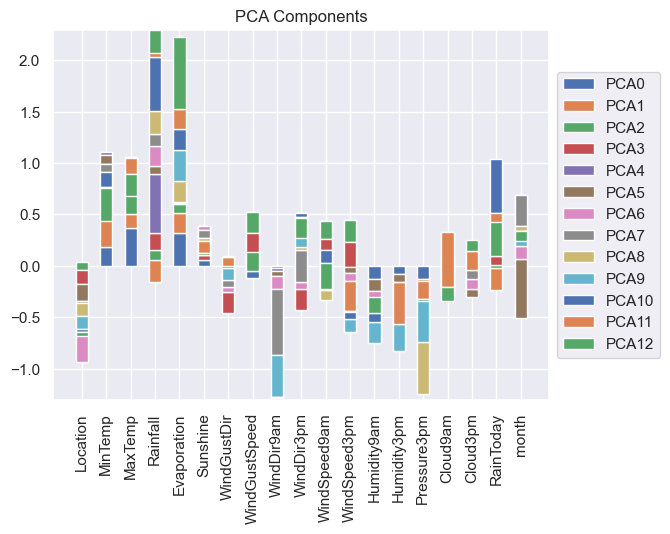

In [111]:
data = pca.components_

index = df4.columns[:]
bar_width = 0.5

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(index))

for row in range(len(data)):
    plt.bar(index, data[row], bar_width, bottom=y_offset,label='PCA'+str(row))
    y_offset = y_offset + data[row] 
    
plt.xticks(rotation=90)
plt.title('PCA Components')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# SelectKbest sur df3

In [28]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression,f_classif,chi2


X_train=df3.drop('RainTomorrow',1)
y_train=df3['RainTomorrow']


sel = SelectKBest(score_func = mutual_info_regression, k=22)
fit=sel.fit(X_train, y_train)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

 #concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1) 
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
print(featureScores.nlargest(22,'Score'))  #print best features

            Specs     Score
9     Humidity3pm  0.107178
4        Sunshine  0.058795
2        Rainfall  0.054026
13       Cloud3pm  0.050025
21      RainToday  0.039407
12       Cloud9am  0.036522
8     Humidity9am  0.035268
10    Pressure9am  0.027976
5   WindGustSpeed  0.024969
11    Pressure3pm  0.022600
15        Temp3pm  0.019764
17       Location  0.011871
1         MaxTemp  0.010409
19     WindDir9am  0.007888
18    WindGustDir  0.005991
3     Evaporation  0.005958
7    WindSpeed3pm  0.005305
20     WindDir3pm  0.005140
0         MinTemp  0.004576
16           Date  0.003834
14        Temp9am  0.003574
6    WindSpeed9am  0.002602


In [29]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression,f_classif,chi2


X_train=df3.drop('RainTomorrow',1)
y_train=df3['RainTomorrow']


sel = SelectKBest(score_func = f_regression, k=22)
fit=sel.fit(X_train, y_train)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

 #concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1) 
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
print(featureScores.nlargest(22,'Score'))  #print best features

            Specs         Score
9     Humidity3pm  33596.712523
4        Sunshine  16526.346083
21      RainToday  14999.484212
13       Cloud3pm  13417.688111
8     Humidity9am   9814.680326
12       Cloud9am   9227.664971
2        Rainfall   8416.737837
10    Pressure9am   8195.576068
5   WindGustSpeed   7408.427875
11    Pressure3pm   6841.842266
15        Temp3pm   5313.031833
1         MaxTemp   3653.141315
3     Evaporation   1153.723276
6    WindSpeed9am   1102.854736
7    WindSpeed3pm   1038.944295
0         MinTemp    990.707695
18    WindGustDir    346.852202
19     WindDir9am    181.903243
20     WindDir3pm    121.507004
14        Temp9am     94.554019
16           Date      8.565507
17       Location      4.396955


In [30]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression,f_classif,chi2


X_train=df3.drop('RainTomorrow',1)
y_train=df3['RainTomorrow']


sel = SelectKBest(score_func = f_classif, k=22)
fit=sel.fit(X_train, y_train)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

 #concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1) 
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
print(featureScores.nlargest(22,'Score'))  #print best features

            Specs         Score
9     Humidity3pm  33596.712523
4        Sunshine  16526.346084
21      RainToday  14999.484212
13       Cloud3pm  13417.688111
8     Humidity9am   9814.680326
12       Cloud9am   9227.664971
2        Rainfall   8416.737837
10    Pressure9am   8195.576054
5   WindGustSpeed   7408.427875
11    Pressure3pm   6841.842323
15        Temp3pm   5313.031833
1         MaxTemp   3653.141315
3     Evaporation   1153.723276
6    WindSpeed9am   1102.854736
7    WindSpeed3pm   1038.944295
0         MinTemp    990.707695
18    WindGustDir    346.852202
19     WindDir9am    181.903243
20     WindDir3pm    121.507004
14        Temp9am     94.554019
16           Date      8.565507
17       Location      4.396955


# Select Kbest sur PCA (issue de df3)

In [37]:
data = df3.drop('RainTomorrow',1)

X_st =  StandardScaler().fit_transform(data)
data = pd.DataFrame(X_st)

pca = PCA(n_components = 0.9)
PCA_result=pca.fit_transform(data)
print("Nombre de composantes retenues :", pca.n_components_)

Nombre de composantes retenues : 13


In [41]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression,f_classif,chi2


X_train=PCA_result
y_train=df3['RainTomorrow']

sel = SelectKBest(score_func = f_classif, k=13)
fit=sel.fit(X_train, y_train)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(['PCA0','PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PC8','PCA9','PCA10','PCA11','PCA12'])

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1) 
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
print(featureScores.nlargest(13,'Score'))  #print best features

    Specs         Score
1    PCA1  34461.618381
0    PCA0   4530.929916
2    PCA2   3428.348924
11  PCA11   2222.062639
5    PCA5   1093.683454
3    PCA3    395.277405
10  PCA10    309.562719
8     PC8    240.300639
6    PCA6    166.101869
4    PCA4    156.011587
12  PCA12    107.793380
9    PCA9     86.011670
7    PCA7      0.005555


# Select Kbest sur PCA (issue de df4)

In [102]:
data = df4.drop('RainTomorrow',1)

X_st =  StandardScaler().fit_transform(data)
data = pd.DataFrame(X_st)

pca = PCA(n_components = 0.9)
PCA_result=pca.fit_transform(data)
print("Nombre de composantes retenues :", pca.n_components_)

Nombre de composantes retenues : 13


In [104]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression,f_classif,chi2


X_train=PCA_result
y_train=df4['RainTomorrow']

sel = SelectKBest(score_func = f_classif, k=13)
fit=sel.fit(X_train, y_train)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(['PCA0','PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PC8','PCA9','PCA10','PCA11','PCA12'])

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1) 
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
print(featureScores.nlargest(13,'Score'))  #print best features

    Specs         Score
0    PCA0  17645.436160
1    PCA1  15033.424657
11  PCA11   2381.592807
2    PCA2   2254.486299
8     PC8   1470.727531
7    PCA7    467.355961
10  PCA10    409.367570
12  PCA12    351.215832
5    PCA5    208.813009
9    PCA9     72.015687
6    PCA6     64.822343
3    PCA3     44.390064
4    PCA4     30.454342
